In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



In [36]:
df = pd.read_csv('Sub_Division_IMD_2017 (1).csv')

In [37]:
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,Lakshadweep,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4184,Lakshadweep,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4185,Lakshadweep,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4
4186,Lakshadweep,2016,59.6,12.1,3.2,2.6,77.4,321.1,262.6,86.2,75.6,58.6,32.0,74.7,1065.7,71.7,83.2,745.4,165.4


In [38]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [39]:
df_dropped = df.drop('SUBDIVISION', axis=1)

In [40]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [41]:
df.drop('SUBDIVISION', axis=1, inplace= True)
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [42]:
df = df.fillna(df.mean())
df = df.replace(0, np.nan).fillna(df.mean())

In [43]:
all_months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
seasonal_data = ['JF', 'MAM', 'JJAS', 'OND']

In [44]:
models = {}
scalers = {}
mse_scores = {}
r2_scores = {}

In [72]:
for target_month in all_months:
    # Features: all months except the target month, plus seasonal data
    features = [month for month in all_months if month != target_month] + seasonal_data
    X = df[features].values
    y = df[target_month].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    models[target_month] = model
    scalers[target_month] = scaler

    mse, r2 = calculate_accuracy(X_test, y_test, model, scaler, target_month)
    mse_scores[target_month] = mse
    r2_scores[target_month] = r2


Accuracy Metrics for JAN:
Mean Squared Error (MSE): 52.01 mm²
R-squared (R²) Score: 0.95

Accuracy Metrics for FEB:
Mean Squared Error (MSE): 54.35 mm²
R-squared (R²) Score: 0.96

Accuracy Metrics for MAR:
Mean Squared Error (MSE): 400.24 mm²
R-squared (R²) Score: 0.81

Accuracy Metrics for APR:
Mean Squared Error (MSE): 514.70 mm²
R-squared (R²) Score: 0.91

Accuracy Metrics for MAY:
Mean Squared Error (MSE): 570.55 mm²
R-squared (R²) Score: 0.97

Accuracy Metrics for JUN:
Mean Squared Error (MSE): 329.53 mm²
R-squared (R²) Score: 0.99

Accuracy Metrics for JUL:
Mean Squared Error (MSE): 347.32 mm²
R-squared (R²) Score: 1.00

Accuracy Metrics for AUG:
Mean Squared Error (MSE): 359.73 mm²
R-squared (R²) Score: 0.99

Accuracy Metrics for SEP:
Mean Squared Error (MSE): 366.02 mm²
R-squared (R²) Score: 0.98

Accuracy Metrics for OCT:
Mean Squared Error (MSE): 421.72 mm²
R-squared (R²) Score: 0.96

Accuracy Metrics for NOV:
Mean Squared Error (MSE): 413.39 mm²
R-squared (R²) Score: 0.91



In [73]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

In [75]:
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [76]:
    y_pred = model.predict(X_test_scaled)

In [77]:
from sklearn.metrics import mean_squared_error, r2_score
def calculate_accuracy(X_test, y_test, model, scaler, month):
         X_test_scaled = scaler.transform(X_test)
         y_pred = model.predict(X_test_scaled)
         mse = mean_squared_error(y_test, y_pred)
         r2 = r2_score(y_test, y_pred)
         print(f"\nAccuracy Metrics for {month}:")
         print(f"Mean Squared Error (MSE): {mse:.2f} mm²")
         print(f"R-squared (R²) Score: {r2:.2f}")
         return mse, r2
mse, r2 = calculate_accuracy(X_test, y_test, model, scaler, target_month)


Accuracy Metrics for DEC:
Mean Squared Error (MSE): 321.72 mm²
R-squared (R²) Score: 0.82


In [78]:
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

In [79]:
    models[target_month] = model
    scalers[target_month] = scaler
    mse_scores[target_month] = mse
    r2_scores[target_month] = r2

In [80]:
    print(f"\nModel for {target_month}:")
    print(f"Mean Squared Error: {mse:.2f} mm²")
    print(f"R-squared Score: {r2:.2f}")
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_:.2f} mm")


Model for DEC:
Mean Squared Error: 321.72 mm²
R-squared Score: 0.82
Coefficients: [  1.85261159   1.20026509   5.18661107   5.32256593  12.61267702
   0.25259337   2.47439832   2.7850593    1.6127227  -68.62313946
 -42.11632552  -1.27821492 -21.29979081  -7.98485479 116.6805524 ]
Intercept: 22.82 mm


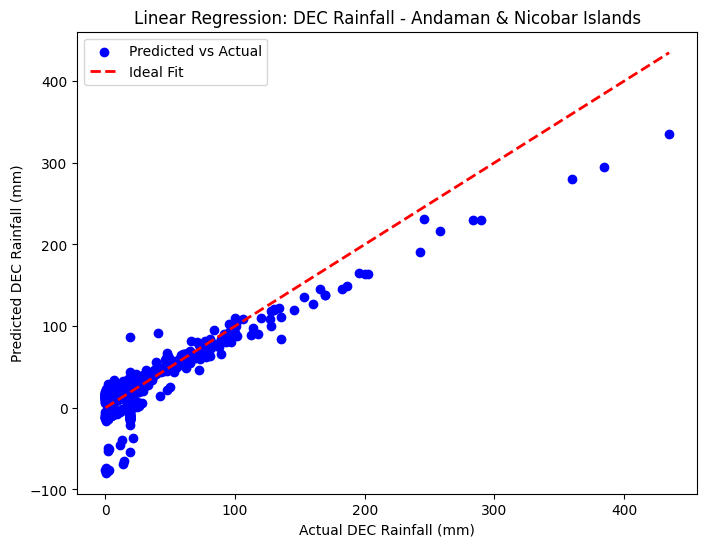

In [87]:
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
    plt.xlabel(f'Actual {target_month} Rainfall (mm)')
    plt.ylabel(f'Predicted {target_month} Rainfall (mm)')
    plt.title(f'Linear Regression: {target_month} Rainfall - Andaman & Nicobar Islands')
    plt.legend()
    plt.show()